In [189]:
import random
import cv2

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_files = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
#     print('파일 리스트')
#     print(files)
    
    while True:
        try:
            random_files.append(random.choice(files))
            file = random_files[-1]
#             print('선택된 파일')
#             print(file)

            img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img_rgb, (image_width, image_height))
            
#             img90 =  cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)  # 시계 방향으로 90도 회전
#             img180 =  cv2.rotate(img, cv2.ROTATE_180)  # 180도 회전
#             img270 =  cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계 방향 90도 회전

            images.append(img)
            images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
            
            for image in images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)
        
            if len(X_array) >= limit:
                break
        
        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
            #             remove(f)
        pass 
    

    
    return X_array, y_array

In [190]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    X_array = []
    y_array = []
    data = []
    
    for i in range(limit):
        random_files.append(random.choice(files))
#     print(random_files)
    
    for i, f in enumerate(random_files):
        try:
            img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
            image_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(image_rgb, (image_width, image_height))

            data = np.asarray(img)
            #Y는 0 아니면 1이니까 index값으로 넣는다.

            X_array.append(data)
            y_array.append(index)

        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
    #             remove(f)
            pass 
            
    return X_array, y_array

In [191]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))
            
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
#             print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [192]:
#본 코드 시작

# from PIL import Image
# import glob, sys, numpy as np
# from  keras.utils import np_utils

import cv2
import os, glob
from os import remove
import numpy as np

def test(image_width, image_height):
    img_dir = './binary_cnn/train'
    # categories = ['ad', 'non_ad']
    categories = os.listdir(img_dir)

    sum = 0
    ad_index = 0
    non_ad_index = 1
#     image_width, image_height = 32, 32

    # file_directory = []
    file_list_index = []
    img_limit_list = []
    X = []
    y = []


    np_classes = len(categories)    
    print(categories)

    for i, category in enumerate(categories):
        file_directory = []
        img_dir_detail = os.path.join(img_dir, category)

        if i == ad_index:
            img_limit = 1600
        elif i == non_ad_index:
            img_limit = 1600

        is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)

        for directory in file_directory:
            file_list_index.append([i, directory])
    #     file_list_index.append([i, file_directory])

    # print(file_directory)
#     print(file_list_index)

#     for lst in file_list_index:
    #     print(lst)
#         print(lst[0])

    count = 0

    # for (index, directories) in file_list_index:
    for index, directory in file_list_index:
    #     for directory in directories:
#         print(directory)
        files = glob.glob(directory + "/*.jpg")
        len_file = len(files)

    #     if index == ad_index:
    #         img_limit = 20
    #     elif index == non_ad_index:
    #         img_limit = 100

        img_limit = img_limit_list[count]

        if len_file <img_limit:
            X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
        else:
            X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)

    #         X.__add__(X_temp)
    #         y.__add__(y_temp)

        X = X + X_temp
        y = y + y_temp

        len_file = len(X_temp)
#         print(directory + '파일 길이 : ' + str(len_file))
        sum += len_file
        count += 1


#     print('총 파일 길이 : ' + str(sum))

    X = np.array(X)
    Y = np.array(y)

    print(len(X), len(Y))
    
    return X, Y

    """이미지 크기 인자를 조절하면서 적용"""

In [193]:
from sklearn.model_selection import train_test_split

def make_data(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y)

    print(X_train.shape)
    print(X_train.shape[0])
    print(y_train.shape)
    print(y_test.shape)
    print(np.bincount(y_train))
    print(np.bincount(y_test))
    
    
    return X_train, X_test, y_train, y_test

In [194]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [195]:
def data_stablized(X_train, X_test):
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    
    return X_train, X_test

In [196]:
from PIL import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model

import tensorflow as tf

size_list = [32, 50, 64, 80, 100, 110, 128, 140, 150, 160, 170, 180, 200]
model_evaluate = []

for size in size_list:
    print('사이즈 : ' + str(size))
    X, Y = test(size, size)
    X_train, X_test, y_train, y_test= make_data(X, Y)
    X_train, X_test = data_stablized(X_train, X_test)
    model = load_model('./binary_cnn/size_variation_model/binary_model_saved' + str(size) + '.h5')
    model_evaluate.append(model.evaluate(X_test, y_test)[1] * 100)

# model = load_model('./binary_cnn/model/binary_model_saved1.h5')
# model_evaluate.append(model.evaluate(X_test, y_test)[1] * 100)
                   
print(model_evaluate)

사이즈 : 32
['ad', 'non_ad']
OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

8 번째에서 에러 
3442 3442
(2581, 32, 32, 3)
2581
(2581,)
(861,)
[1358 1223]
[460 401]
27/27 [==============================] - 0s 10ms/step - loss: 2.7278 - accuracy: 0.6458
사이즈 : 50
['ad', 'non_ad']
OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

14 번째에서 에러 
OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

25 번째에서 에러 
3441 3441
(2580, 50, 50, 3)
2580
(2580,)
(861,)
[1377 1203]
[440 421]
27/27 [==============================] - 1s 19ms/step - loss: 3.9240 - accuracy: 0.5343
사이즈 : 64
['ad', 'non_

In [197]:
# model = load_model('./binary_cnn/size_variation_model/binary_model_saved1.h5')
# model_evaluate.append(model.evaluate(X_test, y_test)[1] * 100)

Text(0, 0.5, 'accuracy')

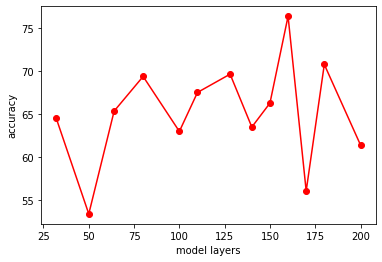

In [198]:
import matplotlib.pyplot as plt

# for i in range():
#     lst.append(i)
    
plt.plot(size_list, model_evaluate, 'ro-')
plt.xlabel('model layers')
plt.ylabel('accuracy')